In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

from sklearn.svm import SVC 
from sklearn.metrics import accuracy_score 
from sklearn.preprocessing import StandardScaler
import joblib

df=pd.read_csv('MRec.csv')
df.head()

,Age,Gender,Mood,Genre
0,55,F,Happy,Rock
1,55,F,Gloomy,Blues
2,55,F,Stressed,Rock
3,55,F,Relaxing,Instrumental
4,55,F,Energetic,Hiphop


In [2]:
df.tail()

,Age,Gender,Mood,Genre
455,18,F,Happy,Pop
456,18,F,Gloomy,Indie/Acoustic
457,18,F,Stressed,Instrumental
458,18,F,Relaxing,Country
459,18,F,Energetic,Rock


In [3]:
#Mean, std, and quartiles of dataset
df.describe()

,Age
count,460.000000
mean,27.510870
std,8.506687
min,18.000000
25%,21.000000
50%,24.000000
75%,32.250000
max,55.000000


In [4]:
#Checking for null values to fill
print("Number of null values:")
print(df.isnull().sum())

Number of null values:
Age       0
Gender    0
Mood      0
Genre     0
dtype: int64


In [5]:
#Checking number of unique values and wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))

Age : [55 49 47 45 43 42 39 37 36 34 33 32 31 30 29 28 27 25 24 23 22 21 20 19
 18]
Gender : ['F' 'M']
Mood : ['Happy' 'Gloomy' 'Stressed' 'Relaxing' 'Energetic']
Genre : ['Rock' 'Blues' 'Instrumental' 'Hiphop' 'Pop' 'Indie/Acoustic' 'Country'
 'EDM']


In [6]:
#Dropping empty columns
df = df.dropna(axis='columns', how='all')

print("Data after dropping empty columns:")
print(df.shape)

Data after dropping empty columns:
(460, 4)


In [7]:
#Replacing categorical data with integer values

df['Gender'].replace(['M','F'],[0,1], inplace=True)
df['Mood'].replace(['Happy','Gloomy','Stressed','Relaxing','Energetic'],[1,2,3,4,5], inplace=True)

df.head(7)


,Age,Gender,Mood,Genre
0,55,1,1,Rock
1,55,1,2,Blues
2,55,1,3,Rock
3,55,1,4,Instrumental
4,55,1,5,Hiphop
5,49,0,1,Rock
6,49,0,2,Pop


In [24]:
df['Age'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Age'])
df['Gender'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Gender'])
df['Mood'].replace('  ', np.nan, inplace=True)
df= df.dropna(subset=['Mood'])


In [25]:
#Replacing NaN instances with mean values

columns=df[['Age','Gender']]
for col in columns:
    df[col]=pd.to_numeric(df[col])
    df[col].fillna(df[col].mean(), inplace=True)
df.head(7)

,Age,Gender,Mood,Genre
0,55,1,1,Rock
1,55,1,2,Blues
2,55,1,3,Rock
3,55,1,4,Instrumental
4,55,1,5,Hiphop
5,49,0,1,Rock
6,49,0,2,Pop


In [26]:
#Checking for null values again
df.isnull().sum()

Age       0
Gender    0
Mood      0
Genre     0
dtype: int64

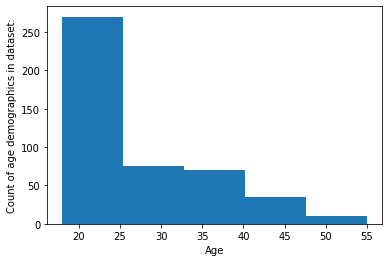

In [11]:
#Histogram of age
plt.hist(df['Age'], bins=5)
plt.xlabel("Age")
plt.ylabel("Count of age demographics in dataset:")

plt.show()

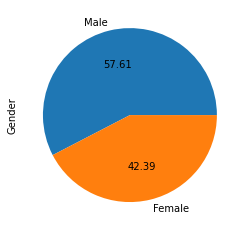

In [12]:
#Distribution of gender by pie-chart
labels = ['Male','Female']
df['Gender'].value_counts().plot(kind="pie", autopct="%.2f", labels=labels)
plt.show()

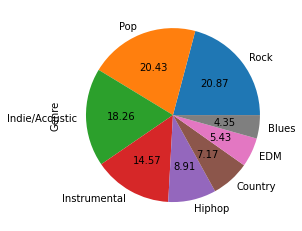

In [13]:
#Distribution of genre by pie-chart
df['Genre'].value_counts().plot(kind="pie", autopct="%.2f")
plt.show()

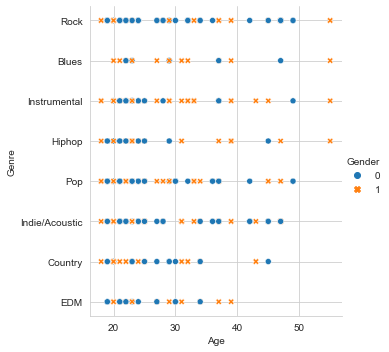

In [14]:
#Relation between Age and Genre, coloured by Gender
sns.set_style("whitegrid");
sns.relplot(x='Age',y='Genre',hue='Gender',style=df['Gender'], data=df)
plt.show();

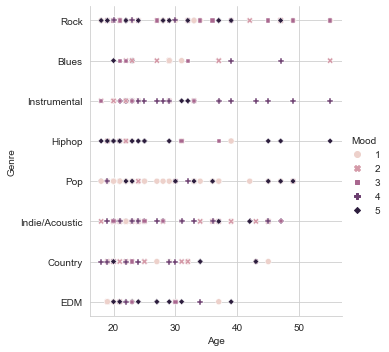

In [17]:
#Unnecessary
#Relation between Age and Genre, coloured by Mood
sns.set_style("whitegrid");
sns.relplot(x='Age',y='Genre',hue='Mood',style=df['Mood'], data=df)
plt.show();

<AxesSubplot:xlabel='Age', ylabel='Genre'>

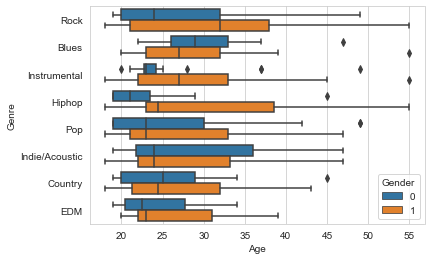

In [15]:
#Boxplot between Age and Genre, coloured by Gender
sns.boxplot(x='Age',y='Genre',hue='Gender',data=df)

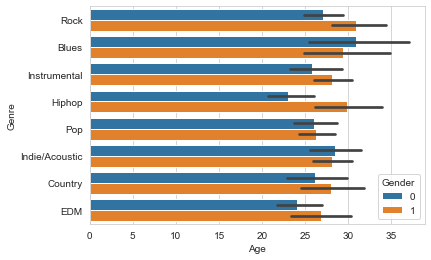

In [16]:
#Unnecessary
sns.barplot(x=df['Age'], y=df['Genre'],hue = df["Gender"])
plt.show()

<AxesSubplot:xlabel='Genre', ylabel='Mood'>

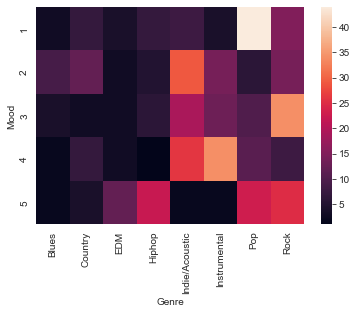

In [18]:
#Correlation between Mood and Genre
sns.heatmap(pd.crosstab(df['Mood'], df['Genre']))

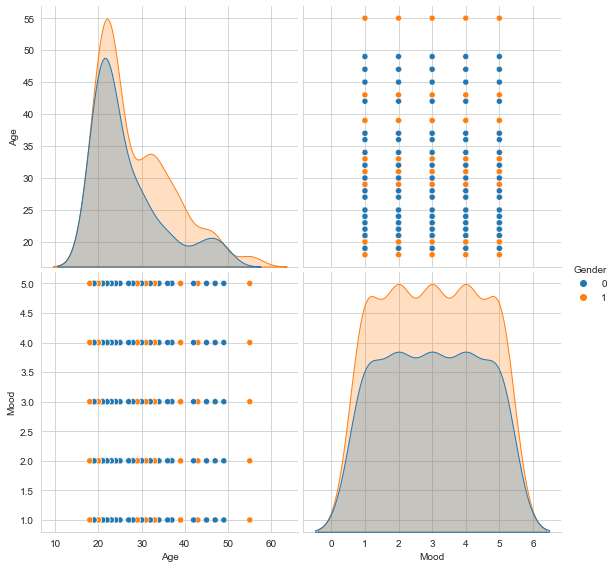

In [19]:
#Pairplot between all numerical categories
sns.set_style("whitegrid");
columns = ['Age','Gender','Mood']
sns.pairplot(df[columns], hue="Gender",height = 4 ,kind ='scatter',diag_kind='kde')
plt.show()

In [22]:
#3D scatter-plot
import plotly.express as px
fig = px.scatter_3d(df, x='Age',
                    y='Gender',
                    z='Mood',
                    color='Genre')
fig.show()

In [27]:
#Model testing
X=df[['Age','Gender','Mood']]
y=df['Genre']
X_train,X_test,y_train,y_test=train_test_split(X.values,y,test_size = 0.25, random_state = 1000)
model=DecisionTreeClassifier()
model=model.fit(X_train, y_train)

In [31]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing dataabs
X_test_norm = norm.transform(X_test)

from joblib import dump, load
joblib.dump(model,'C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')

predictions=model.predict(X_test)

In [33]:
y_pred = model.predict(X_test)

print("accuracy_score: %.2f"
      % accuracy_score(y_test, y_pred))

accuracy_score: 0.29


In [36]:
import pickle
import joblib
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

sc= MinMaxScaler
mdl = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
X= pd.read_csv('MRec.csv')
X_test = [[21,1,1],[22,0,4],[29,0,5],[31,0,4],[55,1,4]]
y_pred=mdl.predict(X_test)

val=pd.DataFrame(y_pred, columns=['Genre'])
val

,Genre
0,Pop
1,EDM
2,Hiphop
3,Country
4,Instrumental


In [39]:
#Load saved model
lr = joblib.load('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.joblib')
#with open('C:/Users/User/Music_Recommendation_App/MusicApp/music_predict.sav' , 'rb') as f:
#    lr = pickle.load(f)
X=[[21,1,1],[22,0,4],[29,0,5],[31,0,4],[55,1,4]]
lr.predict(X)

array(['Pop', 'EDM', 'Hiphop', 'Country', 'Instrumental'], dtype=object)

<AxesSubplot:>

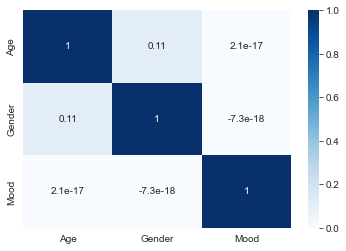

In [40]:
#Relationship analysis
sns.heatmap(df.corr(),cbar=True, annot=True, cmap='Blues')

In [27]:
#Outliers
#q1=df.quantile(0.25)
#q3=df.quantile(0.75)
#iqr=q3-q1

#print(   (df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr))  )